In [1]:
import pyspark as ps
import pyspark.sql.context as f
from pyspark import SQLContext

In [2]:
spark = ps.sql.SparkSession.builder \
        .master("local") \
        .appName("CreditCard-FraudDetection") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

In [3]:
sc= spark.sparkContext

In [4]:
sqlContext=SQLContext(sc)

In [5]:
df = sqlContext.read.csv('creditcard.csv',
                        header = True,
                        inferSchema=True)
df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V22|     

In [6]:
df.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [7]:
import copy

In [8]:
#df_copy=copy.deepcopy(df.schema)
#df_load = df.rdd.zipWithIndex().toDF(df_copy)

In [9]:
#df_load.schema

In [10]:
#df_load.show(5)

In [11]:
df.select(['V'+str(x) for x in range(1,10)]).show(10)

+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+
|                V1|                 V2|                V3|                V4|                 V5|                 V6|                  V7|                V8|                V9|
+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+
|  -1.3598071336738|-0.0727811733098497|  2.53634673796914|  1.37815522427443| -0.338320769942518|  0.462387777762292|   0.239598554061257|0.0986979012610507| 0.363786969611213|
|  1.19185711131486|   0.26615071205963|  0.16648011335321| 0.448154078460911| 0.0600176492822243|-0.0823608088155687| -0.0788029833323113|0.0851016549148104|-0.255425128109186|
| -1.35835406159823|  -1.34016307473609|  1.77320934263119| 0.379779593034328| -0.503198133318193|   1.8004993

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df_pandas=df.toPandas()

In [14]:
df_pandas.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


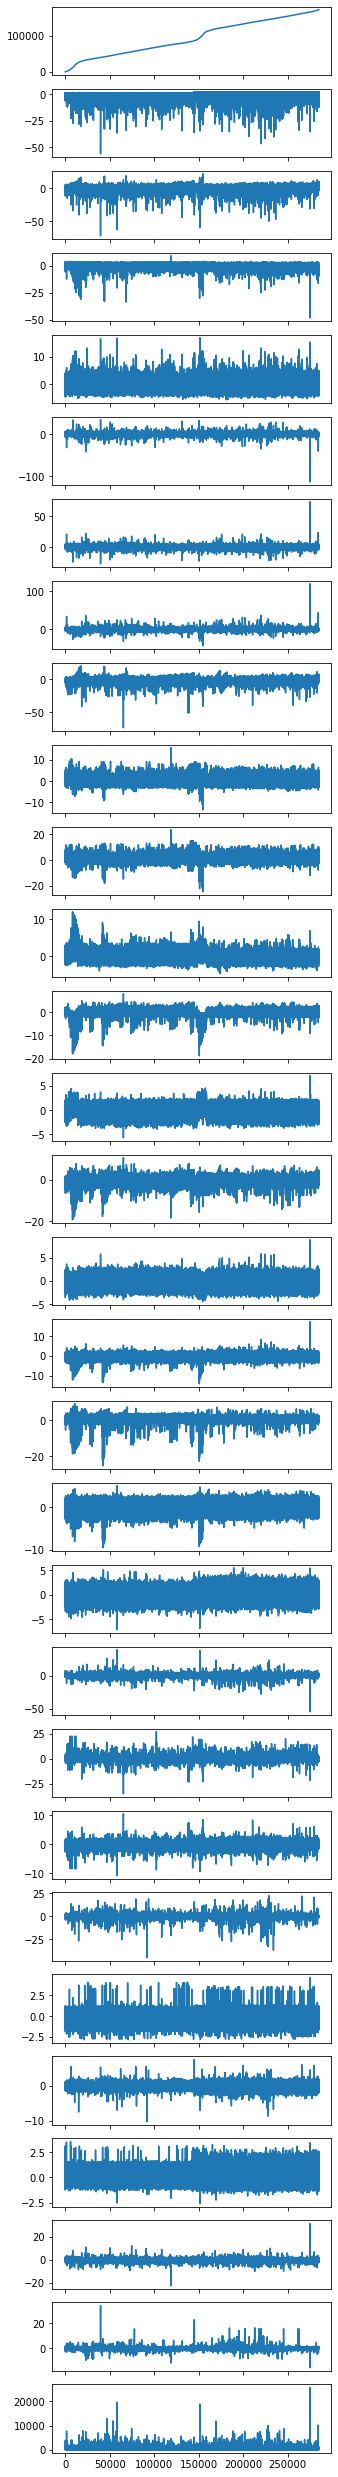

In [15]:
figure,axis=plt.subplots(ncols=1,nrows=30,figsize=(5,45),sharey=False,sharex=True)
for i in range(30):
    axis[i].plot(df_pandas.iloc[:,i].values)
    
    

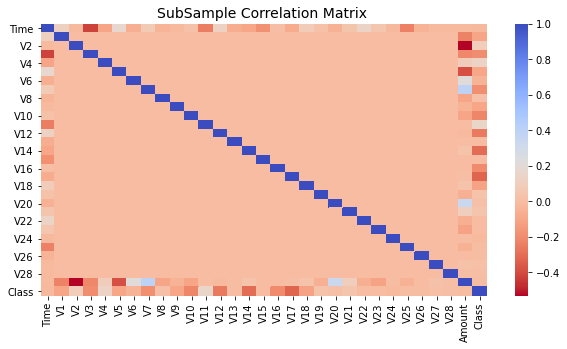

In [16]:

plt.subplots( 1, figsize=(10,5))
sub_sample_corr = df_pandas.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

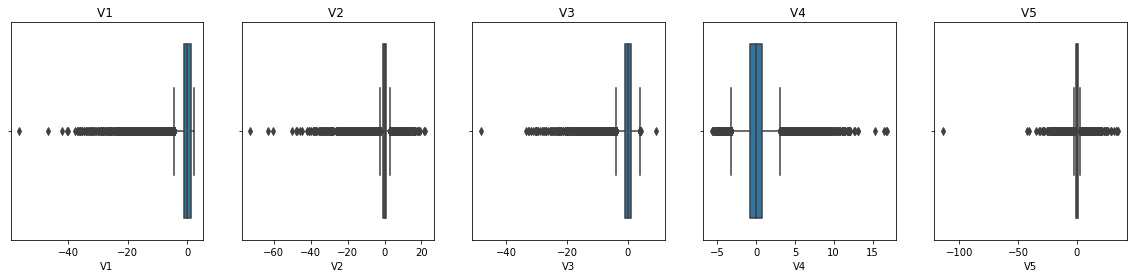

In [17]:


f, axes = plt.subplots(ncols=5, figsize=(20,4))


sns.boxplot(x="V1", data=df_pandas,  ax=axes[0])
axes[0].set_title('V1 ')

sns.boxplot(x="V2", data=df_pandas, ax=axes[1])
axes[1].set_title('V2 ')


sns.boxplot(x="V3", data=df_pandas, ax=axes[2])
axes[2].set_title('V3 ')


sns.boxplot(x="V4", data=df_pandas, ax=axes[3])
axes[3].set_title('V4 ')

sns.boxplot(x="V5", data=df_pandas, ax=axes[4])
axes[4].set_title('V5 ')

plt.show()



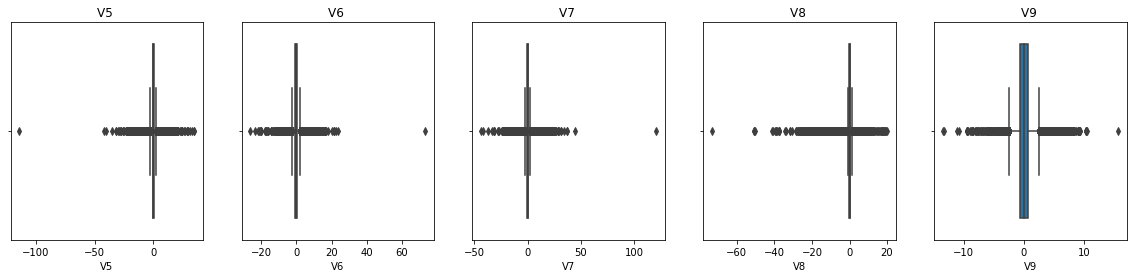

In [18]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

sns.boxplot(x="V5", data=df_pandas,  ax=axes[0])
axes[0].set_title('V5 ')

sns.boxplot(x="V6", data=df_pandas, ax=axes[1])
axes[1].set_title('V6 ')


sns.boxplot(x="V7", data=df_pandas, ax=axes[2])
axes[2].set_title('V7 ')


sns.boxplot(x="V8", data=df_pandas, ax=axes[3])
axes[3].set_title('V8 ')

sns.boxplot(x="V9", data=df_pandas, ax=axes[4])
axes[4].set_title('V9 ')

plt.show()

Back to spark

In [19]:
from pyspark.ml import pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF,Tokenizer
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
from pyspark.ml.feature import VectorAssembler


In [20]:
dfcol=df.columns[1:-1]

In [21]:
from pyspark.sql.functions import col

In [22]:
for column_name in dfcol+['Class']:
    df=df.withColumn(column_name,col(column_name).cast('float'))


In [23]:
df=df.withColumnRenamed('Class','label')

In [24]:
df.columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'label']

In [25]:
vectorAssembler=VectorAssembler(inputCols = df.columns[1:-1],outputCol = 'features')


In [26]:
dftr=vectorAssembler.transform(df)


In [27]:
dftr=dftr.select(['features','label'])
dftr.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-1.3598071336746...|  0.0|
|[1.19185709953308...|  0.0|
|[-1.3583540916442...|  0.0|
|[-0.9662716984748...|  0.0|
|[-1.1582330465316...|  0.0|
+--------------------+-----+
only showing top 5 rows



In [28]:
lr=LogisticRegression(maxIter=10,featuresCol='features',labelCol='label')

In [29]:
model=lr.fit(dftr)

In [30]:
model.summary.areaUnderROC

0.9746128299525789

In [31]:
paramgrid=ParamGridBuilder()\
          .addGrid(lr.regParam,[0.1,0.01])\
          .addGrid(lr.fitIntercept,[False,True])\
          .addGrid(lr.elasticNetParam,[0.0,0.5,1.0])\
          .build()

In [32]:
crossval = CrossValidator(estimator=lr,
                         estimatorParamMaps=paramgrid,
                         evaluator=BinaryClassificationEvaluator(),
                         numFolds=2)

In [37]:
CVModel = crossval.fit(dftr)

In [34]:
CVModel.avgMetrics

[0.87532552959794,
 0.5569933585028406,
 0.5569908038639839,
 0.9785691808224575,
 0.5,
 0.5,
 0.8699057249716224,
 0.7985421910503142,
 0.6577598493074801,
 0.9797122887840534,
 0.9508211666205472,
 0.9175880823679569]

In [35]:
modelAcc = max(CVModel.avgMetrics)
modelAcc

0.9797122887840534